## Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset

In [2]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Checking for duplicated entries

In [4]:
df.duplicated().sum()

np.int64(127)

In [5]:
df = df.drop_duplicates()
df.shape

(9873, 6)

## Normalization 

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
df['Extracurricular Activities'] = encoder.fit_transform(df['Extracurricular Activities'])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## Checking level of correlation between features

<Axes: >

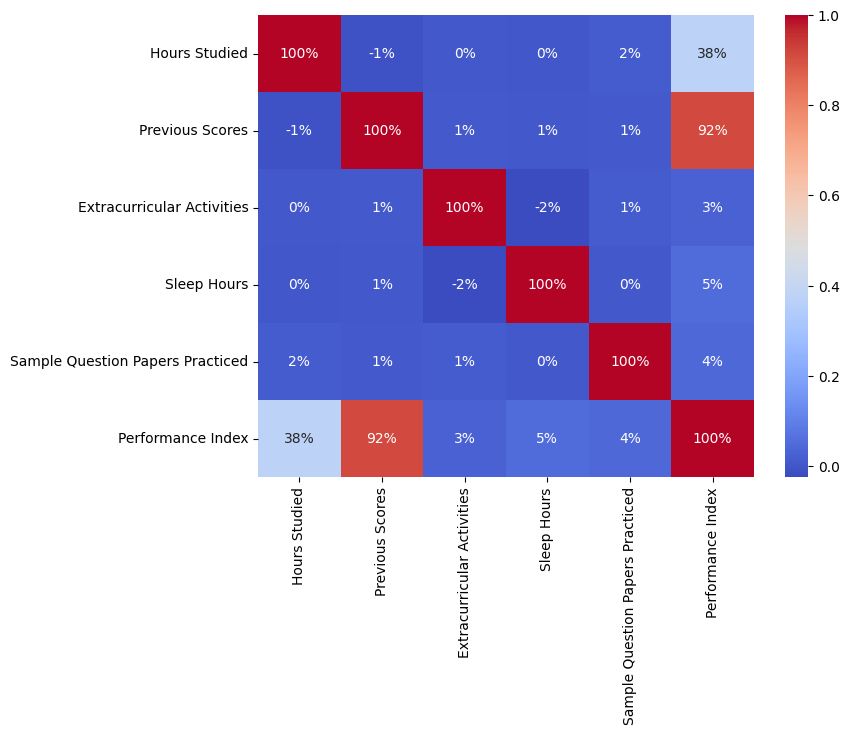

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.0%', annot=True)

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [11]:
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [12]:
# Using linear regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_scale, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
linear.score(X_train_scale, y_train)

0.9888937265788157

In [14]:
linear_pred = linear.predict(X_test_scale)

In [15]:
# Checking error margin and accuarcy
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
mae = mean_absolute_error(y_test, linear_pred)
mse = mean_squared_error(y_test, linear_pred)
rmse = root_mean_squared_error(y_test, linear_pred)
r2 = r2_score(y_test, linear_pred)
print(f"""
MAE: {mae}
MSE: {mse}
RMSE: {rmse}
R2: {r2}
""")


MAE: 1.646199745534188
MSE: 4.326180232071977
RMSE: 2.0799471705002452
R2: 0.9881593003934889



In [16]:
# Performing cross-validation on model
from sklearn.model_selection import cross_val_score, KFold, cross_validate
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Default scoring = R2_score
cv_score = cross_val_score(linear, X_train_scale, y_train, cv=kf)
np.mean(cv_score)

np.float64(0.9888543129182071)

In [17]:
# scoring = neg_mean_squared_error
cv_score = cross_val_score(linear, X_train_scale, y_train, cv=kf, scoring = 'neg_mean_squared_error')
np.mean(np.abs(cv_score))

np.float64(4.120958345550877)

In [18]:
# scoring = neg_root_mean_squared_error
cv_score = cross_val_score(linear, X_train_scale, y_train, cv=kf, scoring = 'neg_root_mean_squared_error')
np.mean(np.abs(cv_score))

np.float64(2.029920246942013)

In [19]:
# scoring = 'neg_mean_absolute_error'
cv_score = cross_val_score(linear, X_train_scale, y_train, cv=kf, scoring = 'neg_mean_absolute_error')
np.mean(np.abs(cv_score))

np.float64(1.6144440012592636)

In [20]:
scores_cvalidate = cross_validate(linear, X_train_scale, y_train, scoring='neg_root_mean_squared_error', cv=10)
scores_cvalidate_df = pd.DataFrame(scores_cvalidate)

In [21]:
scores_cvalidate_df

,fit_time,score_time,test_score
0,0.007559,0.000988,-1.984872
1,0.006039,0.000941,-2.024582
2,0.007529,0.001996,-2.117053
3,0.005516,0.001957,-2.008397
4,0.006052,0.000998,-2.025452
5,0.005034,0.001561,-2.094262
6,0.002912,0.001995,-1.991567
7,0.004175,0.001981,-2.019002
8,0.004988,0.001995,-2.085956
9,0.003502,0.011113,-1.942342


In [22]:
scores_cvalidate_df['test_score'] = np.absolute(scores_cvalidate_df['test_score'])
scores_cvalidate_df

,fit_time,score_time,test_score
0,0.007559,0.000988,1.984872
1,0.006039,0.000941,2.024582
2,0.007529,0.001996,2.117053
3,0.005516,0.001957,2.008397
4,0.006052,0.000998,2.025452
5,0.005034,0.001561,2.094262
6,0.002912,0.001995,1.991567
7,0.004175,0.001981,2.019002
8,0.004988,0.001995,2.085956
9,0.003502,0.011113,1.942342


In [23]:
np.mean(scores_cvalidate_df['test_score'])

np.float64(2.0293484824674346)

In [24]:
# Using regularization models
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [25]:
lasso = Lasso(alpha=.1)

In [26]:
lasso.fit(X_train_scale, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [27]:
lasso.score(X_train_scale, y_train)

0.9887597202533721

In [28]:
lasso_pred = lasso.predict(X_test_scale)

In [29]:
mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = root_mean_squared_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)
print(f"""
MAE: {mae}
MSE: {mse}
RMSE: {rmse}
R2: {r2}
""")


MAE: 1.663845140092964
MSE: 4.416090792910162
RMSE: 2.1014496884080196
R2: 0.9879132163458466



In [30]:
# Default scoring = R2_score
cv_score = cross_val_score(lasso, X_train_scale, y_train, cv=kf)
np.mean(cv_score)

np.float64(0.9887182525863638)

In [31]:
# scoring = neg_mean_squared_error
cv_score = cross_val_score(linear, X_train_scale, y_train, cv=kf, scoring = 'neg_mean_squared_error')
np.mean(np.abs(cv_score))

np.float64(4.120958345550877)

In [32]:
# scoring = neg_root_mean_squared_error
cv_score = cross_val_score(linear, X_train_scale, y_train, cv=kf, scoring = 'neg_root_mean_squared_error')
np.mean(np.abs(cv_score))

np.float64(2.029920246942013)

In [33]:
# scoring = 'neg_mean_absolute_error'
cv_score = cross_val_score(linear, X_train_scale, y_train, cv=kf, scoring = 'neg_mean_absolute_error')
np.mean(np.abs(cv_score))

np.float64(1.6144440012592636)

In [34]:
scores_cvalidate = cross_validate(lasso, X_train_scale, y_train, scoring='neg_root_mean_squared_error', cv=10)
scores_cvalidate_df = pd.DataFrame(scores_cvalidate)

In [35]:
scores_cvalidate_df['test_score'] = np.absolute(scores_cvalidate_df['test_score'])
scores_cvalidate_df

,fit_time,score_time,test_score
0,0.004870,0.002050,1.999766
1,0.006029,0.002041,2.034139
2,0.004988,0.002991,2.142663
3,0.004548,0.001993,2.016268
4,0.003206,0.001001,2.041159
5,0.002993,0.001994,2.102676
6,0.003989,0.000998,1.994733
7,0.003366,0.006040,2.030442
8,0.002035,0.001548,2.096730
9,0.003964,0.001992,1.955117


In [36]:
np.mean(scores_cvalidate_df['test_score'])

np.float64(2.0413692918174577)